In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from hurst_exp import *
import matplotlib

plt.rcParams.update({
    "font.family": "serif",
})
matplotlib.rcParams["text.usetex"] = True

In [68]:
file = "pink_noise.dat"
df = pd.read_csv(file, sep=" ", header=None)

In [69]:
df.drop(columns=[2], inplace=True)
df.columns = ["t", "data"]

In [70]:
df.head()

,t,data
0,0,0.245142
1,1,0.388782
2,2,0.423227
3,3,0.411164
4,4,0.335192


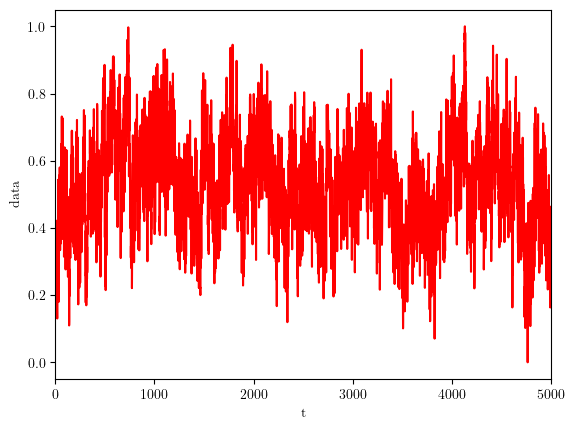

In [71]:
sns.lineplot(x="t", y="data", data=df, color="red")
plt.xlim([0,5000])
plt.show()

In [2]:
np.random.seed(30)  # Fijar la semilla para reproducibilidad
ruido_blanco = np.random.normal(0, 1, 10000)

#h_exp(ruido_blanco, 1000)
mfdfa(ruido_blanco, max_scale=1000, order=1)

(0.5047819043357248, 0.0014078144693450171)

# ALL DATAFRAMES

In [3]:
files = glob.glob("*dat")

In [4]:
H = []
H_err = []

for f in files:
    df = pd.read_csv(f, sep=" ", header=None)
    df.drop(columns=[2], inplace=True)
    df.columns = ["t", "data"]
    h = mfdfa(df.data.values, max_scale=1000, order=1)
    H.append(h[0])
    H_err.append(h[1])

In [5]:
H, H_err

([0.12328732721264936,
  0.35347270228300626,
  0.9854565732167062,
  0.5309466007565291,
  1.1605485059109903,
  1.5480302943501563],
 [0.0006327997445677995,
  0.0021925693204425927,
  0.002598747554772506,
  0.0017243269823241463,
  0.01026056849770969,
  0.003036521921303739])

In [6]:
files

['blue_noise.dat',
 'logistic_map_r38.dat',
 'pink_noise.dat',
 'white_noise.dat',
 'chua_x.dat',
 'brown_noise.dat']

In [7]:
kind = ["White Noise", "Pink Noise", "Blue Noise", "Brown Noise", "Chua's Circuit", "Logistic Map"]

In [8]:
Hurst = []
Hurst_err = []

for k in kind:
    for i, c in enumerate(files):
        if k[:4].lower() in c:
            Hurst.append(H[i])
            Hurst_err.append(H_err[i])
            break

In [9]:
Hurst, Hurst_err

([0.5309466007565291,
  0.9854565732167062,
  0.12328732721264936,
  1.5480302943501563,
  1.1605485059109903,
  0.35347270228300626],
 [0.0017243269823241463,
  0.002598747554772506,
  0.0006327997445677995,
  0.003036521921303739,
  0.01026056849770969,
  0.0021925693204425927])

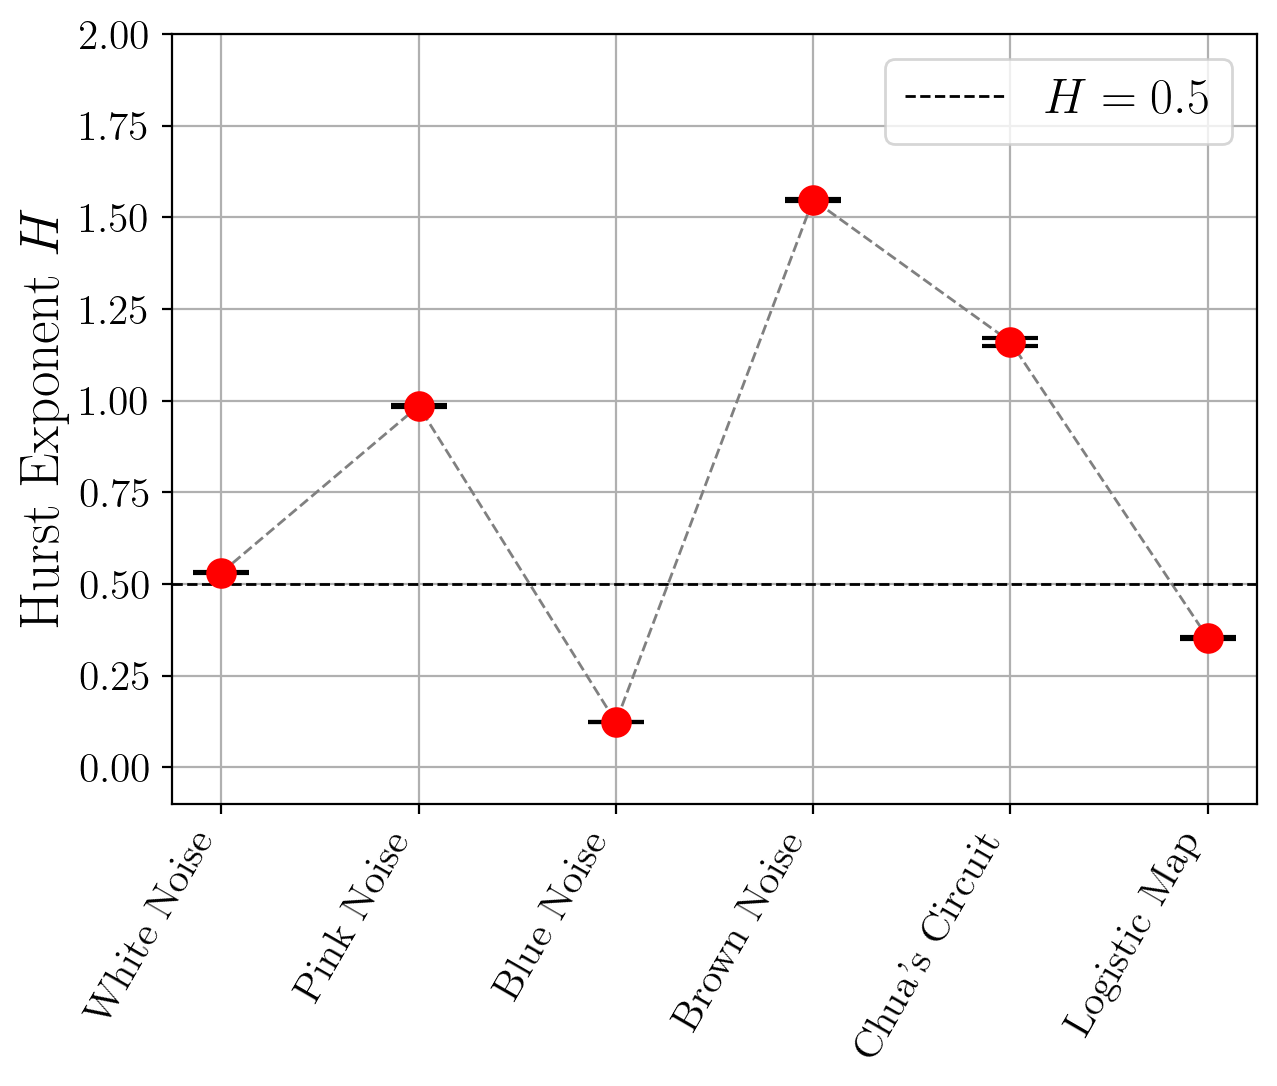

In [10]:
plt.figure(dpi=200, figsize=(7, 5))

# Gráfico con barras de error y diferentes colores para la línea y los puntos
plt.errorbar(kind, Hurst, yerr=Hurst_err, fmt='o', color="Red", capsize=10,
            capthick=1.5, markersize=10, ecolor='black')

# Dibujar la línea en un color distinto, usando 'plt.plot'
plt.plot(kind, Hurst, color="grey", linestyle="--", linewidth=1)

plt.axline((0, 0.5), linestyle="--", color="black", slope=0, label="$H=0.5$", linewidth=1)
# Agregar etiquetas y título
plt.ylabel('Hurst Exponent $H$', fontsize=20)
#plt.xlabel('Kind')
plt.ylim([-0.1, 2])
plt.xticks(rotation=60, ha="right", size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(loc="upper right", fontsize=18)

#plt.savefig("hurst_exp_cases.png", bbox_inches="tight")
# Mostrar el gráfico
plt.show()

In [10]:
df_hurst = pd.DataFrame()
df_hurst["kind"] = kind
df_hurst["H"] = Hurst
df_hurst["H_error"] = Hurst_err

In [11]:
df_hurst

,kind,H,H_error
0,White Noise,0.524071,0.001953
1,Pink Noise,0.985729,0.004051
2,Blue Noise,0.122434,0.000756
3,Brown Noise,1.574386,0.003881
4,Chua's Circuit,1.161565,0.010550
5,Logistic Map,0.351268,0.002434


In [75]:
df_hurst.to_csv("hurst_exp_cases.csv", index=False)

# DATOS FALTANTES

In [86]:
n_data = [1000*i for i in range(1, 6)]
folders = glob.glob("data/*")

dfs = []

for fold in folders:
    df_h = pd.DataFrame()
    H = []
    H_err = []
    for n in n_data:
        file = f"{fold}/{n}.dat"
        df_ts = pd.read_csv(file, sep=" ", header=None)
        #df_ts.drop(columns=[2], inplace=True)
        df_ts.columns = ["t", "data"]
        h, h_err = mfdfa(df_ts.data, max_scale=1000, order=1)
        H.append(h)
        H_err.append(h_err)
    df_h["H"] = H
    df_h["H_error"] = H_err
    df_h["folder"] = fold.split("/")[1]
    df_h["n_data"] = n_data
    dfs.append(df_h)

In [87]:
df = pd.concat(dfs)

In [94]:
kind_name = {
    "chua_circuit": "Chua's Circuit",
    "white_noise": "White Noise",
    "blue_noise": "Blue Noise",
    "pink_noise": "Pink Noise",
    "brown_noise": "Brown Noise",
    "logistic_map": "Logistic Map"
}

In [96]:
df["kind"] = df["folder"].map(kind_name)

In [98]:
df.sample(5)

,H,H_error,folder,n_data,kind
2,0.914952,0.003462,pink_noise,3000,Pink Noise
2,0.490285,0.003293,logistic_map,3000,Logistic Map
0,0.734120,0.004937,pink_noise,1000,Pink Noise
4,1.574386,0.003881,brown_noise,5000,Brown Noise
0,0.410588,0.003527,blue_noise,1000,Blue Noise


In [99]:
kind

['White Noise',
 'Pink Noise',
 'Blue Noise',
 'Brown Noise',
 "Chua's Circuit",
 'Logistic Map']

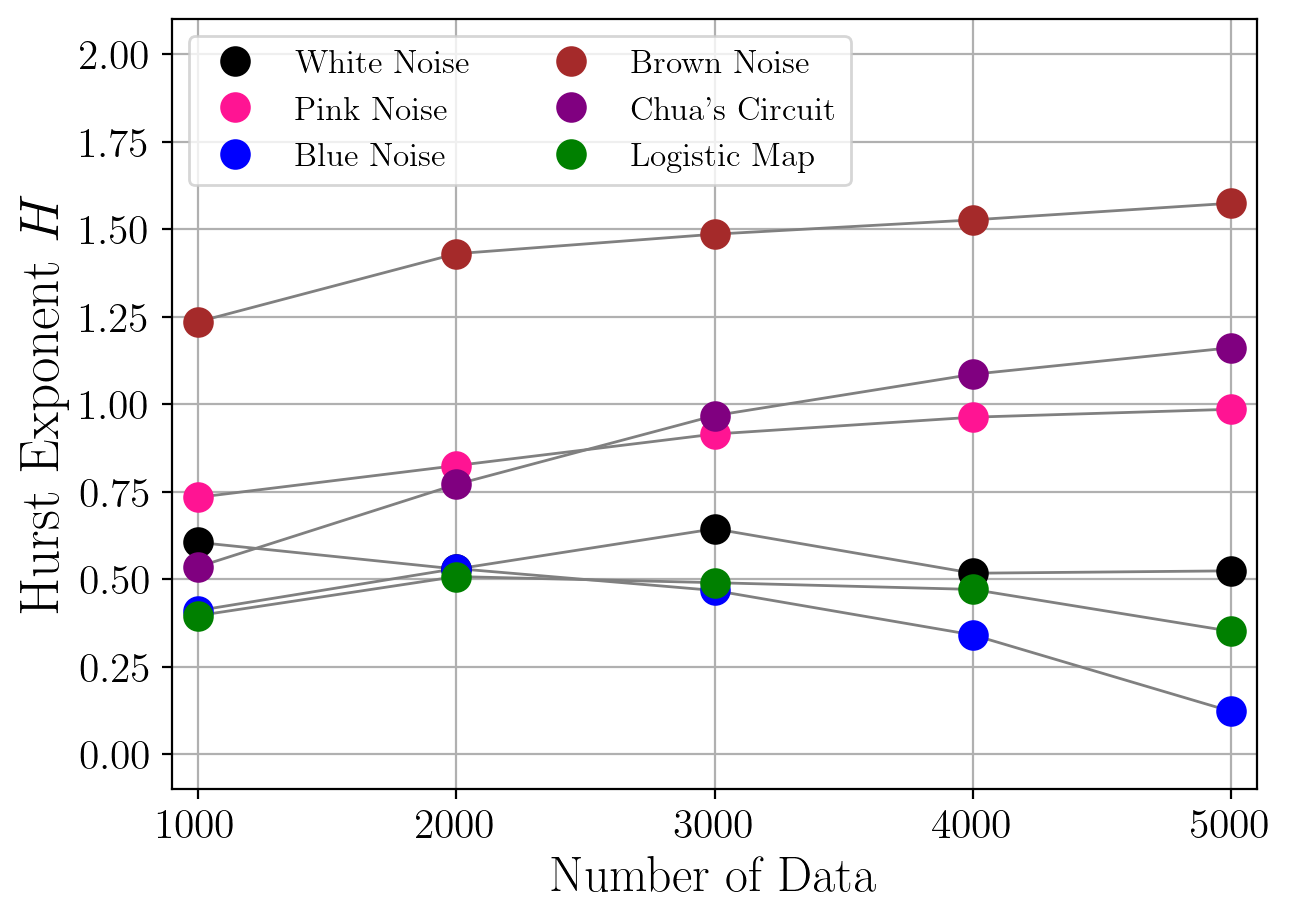

In [134]:
plt.figure(dpi=200, figsize=(7, 5))

# Gráfico con barras de error y diferentes colores para la línea y los puntos
color = ["Black", "deeppink", "Blue", "Brown", "Purple", "Green"]

# Dibujar la línea en un color distinto, usando 'plt.plot'
for i, k in enumerate(kind):
    df_k = df[df.kind == k]
    plt.plot(df_k.n_data, df_k.H, color="grey", linestyle="-", linewidth=1)
    plt.errorbar(df_k.n_data, df_k.H, fmt='o', color=color[i], capsize=10,
            capthick=1.5, markersize=10, ecolor='black', label=k)

#plt.axline((0, 0.5), linestyle="--", color="black", slope=0, label="$H=0.5$", linewidth=1)
# Agregar etiquetas y título
plt.ylabel('Hurst Exponent $H$', fontsize=20)
plt.xlabel('Number of Data', fontsize=18)
plt.xlim([900, 5100])
plt.ylim([-0.1, 2.1])
#plt.xticks(rotation=60, ha="right", size=15)
plt.yticks(size=15)
plt.xticks(n_data, size=15)
plt.grid()
plt.legend(loc="upper left", fontsize=12, ncol=2)

plt.savefig("hurst_exp_number.png", bbox_inches="tight")
# Mostrar el gráfico
plt.show()

In [129]:
df.to_csv("hurst_exp_cases_number.csv", index=False)

# SPECTRAL ANALYSIS

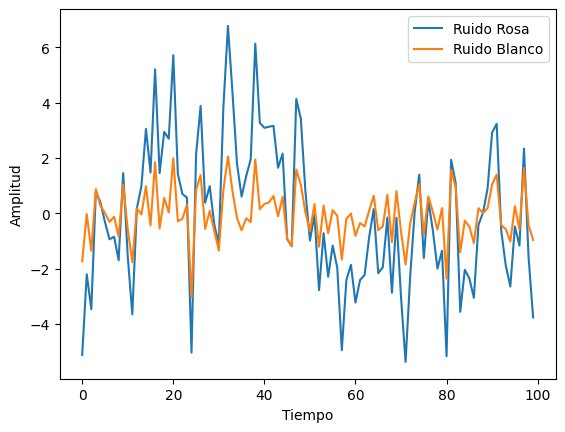

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generar_ruido_rosa(n):
    # Generar ruido blanco
    ruido_blanco = np.random.normal(size=n)
    # Transformada de Fourier del ruido blanco
    fft_vals = np.fft.rfft(ruido_blanco)
    # Ajuste de la amplitud en función de 1/f
    freqs = np.fft.rfftfreq(n)
    fft_vals = fft_vals / np.where(freqs == 0, 1, freqs**0.5)  # Dividir por raíz de f
    # Transformada inversa para regresar al dominio del tiempo
    ruido_rosa = np.fft.irfft(fft_vals)
    return ruido_rosa, ruido_blanco

# Generar y graficar el ruido rosa
n = 100
ruido_rosa, ruido_blanco = generar_ruido_rosa(n)
plt.plot(ruido_rosa, label="Ruido Rosa")
plt.plot(ruido_blanco, label="Ruido Blanco")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

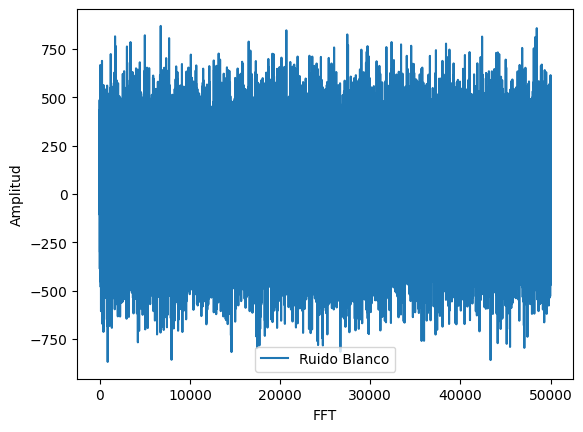

In [5]:
ruido_blanco = np.random.normal(size=100000)
# Transformada de Fourier del ruido blanco
fft_vals = np.fft.rfft(ruido_blanco)

plt.plot(fft_vals, label="Ruido Blanco")
plt.xlabel("FFT")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

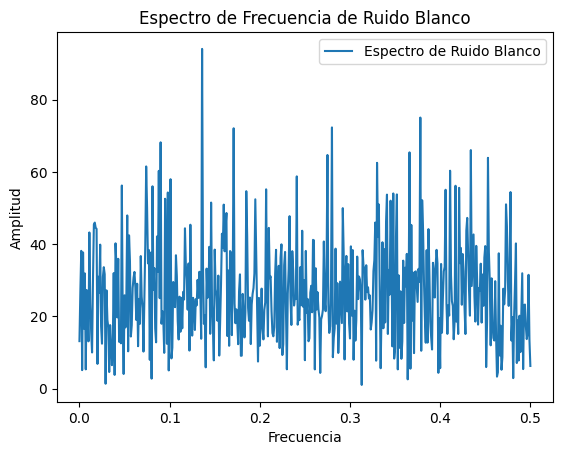

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generar ruido blanco
n = 1000
ruido_blanco = np.random.normal(size=n)
# Transformada de Fourier del ruido blanco
fft_vals = np.fft.rfft(ruido_blanco)
# Obtener las frecuencias correspondientes
freqs = np.fft.rfftfreq(n)

# Graficar el espectro de ruido blanco
plt.plot(freqs, np.abs(fft_vals), label="Espectro de Ruido Blanco")
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.legend()
plt.title("Espectro de Frecuencia de Ruido Blanco")
plt.show()

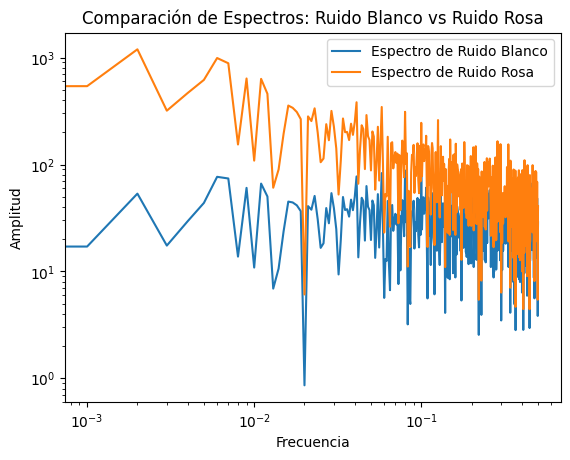

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración
n = 1000

# Generar ruido blanco
ruido_blanco = np.random.normal(size=n)

# Transformada de Fourier del ruido blanco
fft_vals_blanco = np.fft.rfft(ruido_blanco)
freqs = np.fft.rfftfreq(n)

# Generar ruido rosa
# Escalar la magnitud de las frecuencias para convertir ruido blanco en ruido rosa (1/f)
fft_vals_rosa = fft_vals_blanco / np.where(freqs == 0, 1, freqs**0.5)  # Dividir por raíz de f para 1/f
# Transformada inversa para regresar al dominio del tiempo (ruido rosa)
ruido_rosa = np.fft.irfft(fft_vals_rosa)
# Calcular nuevamente la transformada para el espectro de ruido rosa
fft_vals_rosa = np.fft.rfft(ruido_rosa)

# Graficar ambos espectros
plt.plot(freqs, np.abs(fft_vals_blanco), label="Espectro de Ruido Blanco")
plt.plot(freqs, np.abs(fft_vals_rosa), label="Espectro de Ruido Rosa")
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.yscale("log")  # Escala logarítmica para amplitud
plt.xscale("log")  # Escala logarítmica para frecuencia
plt.legend()
plt.title("Comparación de Espectros: Ruido Blanco vs Ruido Rosa")
plt.show()
